This kernel is going to use machine learning to predict and recognize fraudulent credit card transactions so customers are not charged for items that they did not purchase.

[This dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

**Description:**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Import Libraries & The Data
First, we import necessary libraries, such as:

In [293]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

Then, import the data

In [294]:
train = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Exploratory Data Analysis
### Data Exploration

Display the ```head()``` and ```info()``` to familiarize ourself with the data.

In [295]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for Missing Values in Each Feature

In [297]:
print('Percentage of missing values:')
print('-----------------------------')
print(train.isnull().sum().sort_values(ascending=False) / len(train) * 100)

Percentage of missing values:
-----------------------------
Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64


There is no missing data in the entire dataset.

### Check for Imbalance of Target Array

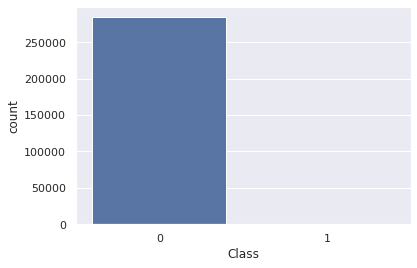

In [298]:
#check for imbalance
sns.countplot(train['Class']);

In [299]:
print('Percentage of target array distribution:')
print('----------------------------------------')
print(train['Class'].value_counts() / len(train['Class']) * 100)

Percentage of target array distribution:
----------------------------------------
0    99.827251
1     0.172749
Name: Class, dtype: float64


The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

### Plot Distribution of Numerical Features

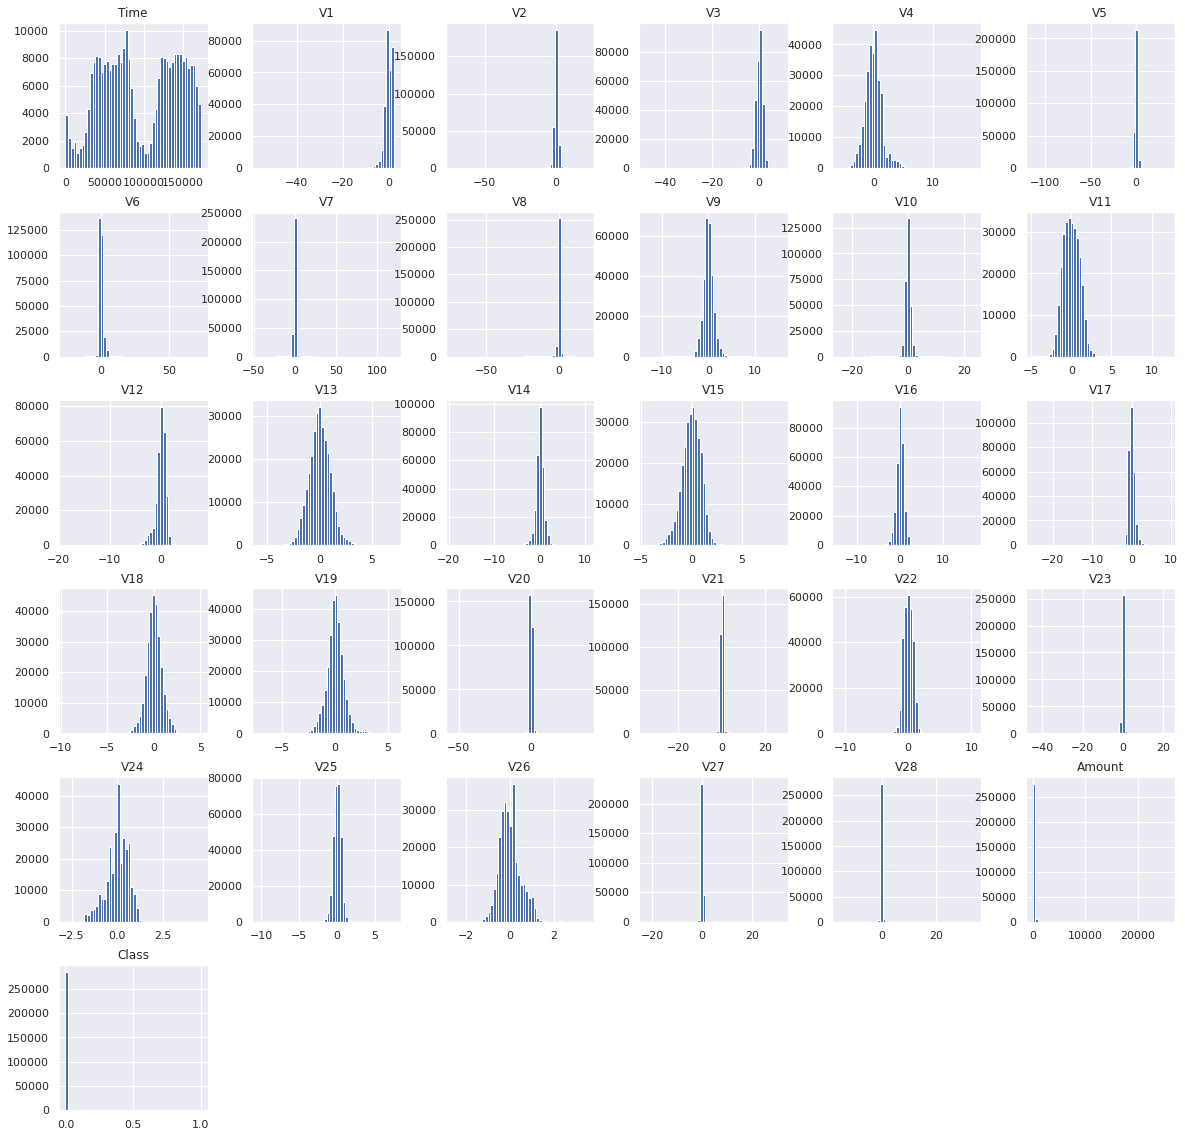

In [300]:
#plot distribution
train.hist(bins=50, figsize=(20,20));

### Plot Density of Features

<Figure size 432x288 with 0 Axes>

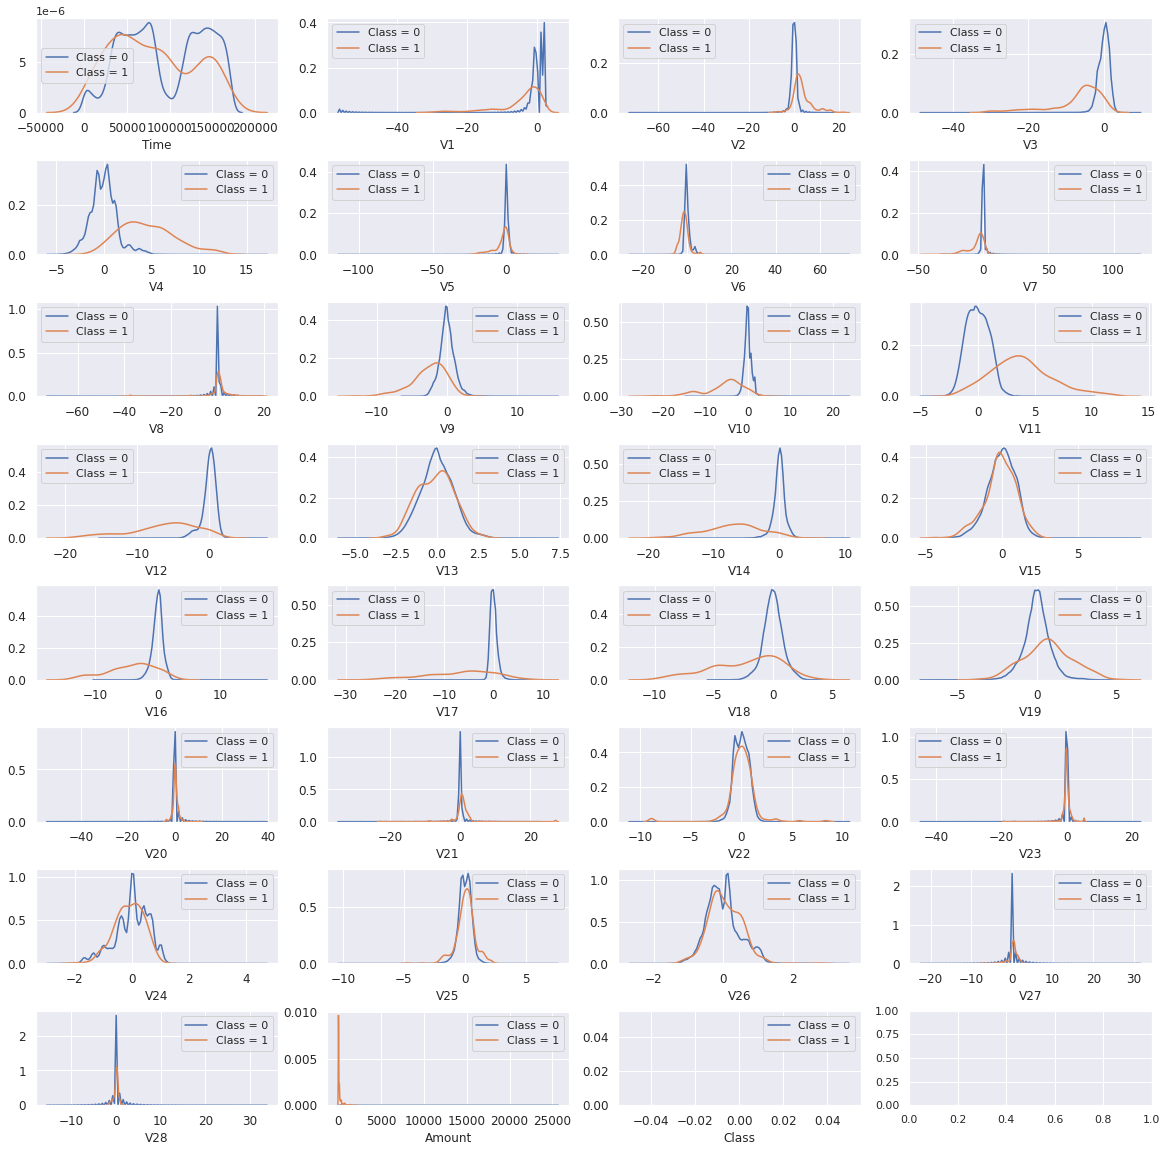

In [301]:
class_0 = train[train['Class'] == 0]
class_1 = train[train['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(20,20))

i = 0
for feature in train.columns.values:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(class_0[feature], label="Class = 0")
    sns.kdeplot(class_1[feature], label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    fig.subplots_adjust(hspace=0.5)
    
plt.show()

Quick insight from plots above:
- V1, V2, V3, and V10 have a distinct profile for values of Class feature.
- V25, V26, and V28 have similar profiles for values of Class feature.
- V4 and V11 have separated distributions for Class feature. 
- V12, V14, and V18 have partially separated distributions for Class feature, 
- For PCA features, the features distribution for not fraud transactions (0) is centered around 0, but in the same time, the features distribution for fraud transactions (1) have a skewed distribution.
- In the Time feature, fraud transactions are more uniformly distributed, while normal transactions have a cyclical distribution.

### Check for Duplicate

In [302]:
#check for duplicates
print('Duplicated value(s) on the train dataset : ', train.duplicated().sum())

Duplicated value(s) on the train dataset :  1081


In [303]:
#remove duplicates
train.drop_duplicates(inplace=True)

# Feature Engineering
### Drop Features

In [304]:
target_array = train['Class']
train.drop(["Class"], axis=1, inplace=True)

#train.drop(['Time', 'Amount'], axis=1, inplace=True)

print('train shape: ', train.shape)

train shape:  (283726, 30)


### Split Data for Test and Validation

In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target_array, test_size=0.333, random_state=7)

### Oversampling Data Using SMOTE

In [306]:
print("Class = 1 before using SMOTE: ", sum(y_train==1))
print("Class = 0 before using SMOTE: ", sum(y_train==0))

Class = 1 before using SMOTE:  328
Class = 0 before using SMOTE:  188917


In [307]:
from imblearn.over_sampling import SMOTE

#over-sampling
OS = SMOTE(random_state=12)
X_train_OS, y_train_OS = OS.fit_sample(X_train, y_train)

In [308]:
print("Class = 1 after using SMOTE: ", sum(y_train_OS==1))
print("Class = 0 after using SMOTE: ", sum(y_train_OS==0))

Class = 1 after using SMOTE:  188917
Class = 0 after using SMOTE:  188917


# Creating A Model
Model training : CatBoostClassifier

In [309]:
from catboost import CatBoostClassifier

#tuning the model
model = CatBoostClassifier(iterations=500,
                             learning_rate=0.1,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 7,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 1,
                             od_wait=100)

#fitting
model.fit(X_train_OS, y_train_OS)

0:	total: 539ms	remaining: 4m 28s
1:	total: 1.19s	remaining: 4m 56s
2:	total: 1.8s	remaining: 4m 58s
3:	total: 2.34s	remaining: 4m 50s
4:	total: 2.88s	remaining: 4m 45s
5:	total: 3.41s	remaining: 4m 41s
6:	total: 3.94s	remaining: 4m 37s
7:	total: 4.51s	remaining: 4m 37s
8:	total: 5.07s	remaining: 4m 36s
9:	total: 5.74s	remaining: 4m 41s
10:	total: 6.42s	remaining: 4m 45s
11:	total: 6.99s	remaining: 4m 44s
12:	total: 7.54s	remaining: 4m 42s
13:	total: 8.08s	remaining: 4m 40s
14:	total: 8.64s	remaining: 4m 39s
15:	total: 9.2s	remaining: 4m 38s
16:	total: 9.73s	remaining: 4m 36s
17:	total: 10.3s	remaining: 4m 34s
18:	total: 10.8s	remaining: 4m 34s
19:	total: 11.4s	remaining: 4m 32s
20:	total: 11.9s	remaining: 4m 31s
21:	total: 12.4s	remaining: 4m 29s
22:	total: 12.9s	remaining: 4m 28s
23:	total: 13.5s	remaining: 4m 26s
24:	total: 14s	remaining: 4m 25s
25:	total: 14.5s	remaining: 4m 24s
26:	total: 15.1s	remaining: 4m 23s
27:	total: 15.6s	remaining: 4m 22s
28:	total: 16.1s	remaining: 4m 21s

230:	total: 1m 54s	remaining: 2m 13s
231:	total: 1m 54s	remaining: 2m 12s
232:	total: 1m 55s	remaining: 2m 12s
233:	total: 1m 55s	remaining: 2m 11s
234:	total: 1m 56s	remaining: 2m 11s
235:	total: 1m 56s	remaining: 2m 10s
236:	total: 1m 57s	remaining: 2m 10s
237:	total: 1m 57s	remaining: 2m 9s
238:	total: 1m 58s	remaining: 2m 8s
239:	total: 1m 58s	remaining: 2m 8s
240:	total: 1m 58s	remaining: 2m 7s
241:	total: 1m 59s	remaining: 2m 7s
242:	total: 1m 59s	remaining: 2m 6s
243:	total: 2m	remaining: 2m 6s
244:	total: 2m	remaining: 2m 5s
245:	total: 2m 1s	remaining: 2m 5s
246:	total: 2m 1s	remaining: 2m 4s
247:	total: 2m 2s	remaining: 2m 4s
248:	total: 2m 2s	remaining: 2m 3s
249:	total: 2m 3s	remaining: 2m 3s
250:	total: 2m 3s	remaining: 2m 2s
251:	total: 2m 4s	remaining: 2m 2s
252:	total: 2m 4s	remaining: 2m 1s
253:	total: 2m 5s	remaining: 2m 1s
254:	total: 2m 5s	remaining: 2m
255:	total: 2m 5s	remaining: 2m
256:	total: 2m 6s	remaining: 1m 59s
257:	total: 2m 7s	remaining: 1m 59s
258:	total

458:	total: 3m 37s	remaining: 19.5s
459:	total: 3m 38s	remaining: 19s
460:	total: 3m 38s	remaining: 18.5s
461:	total: 3m 39s	remaining: 18s
462:	total: 3m 39s	remaining: 17.6s
463:	total: 3m 40s	remaining: 17.1s
464:	total: 3m 40s	remaining: 16.6s
465:	total: 3m 40s	remaining: 16.1s
466:	total: 3m 41s	remaining: 15.6s
467:	total: 3m 41s	remaining: 15.2s
468:	total: 3m 42s	remaining: 14.7s
469:	total: 3m 42s	remaining: 14.2s
470:	total: 3m 43s	remaining: 13.7s
471:	total: 3m 43s	remaining: 13.3s
472:	total: 3m 44s	remaining: 12.8s
473:	total: 3m 44s	remaining: 12.3s
474:	total: 3m 45s	remaining: 11.8s
475:	total: 3m 45s	remaining: 11.4s
476:	total: 3m 45s	remaining: 10.9s
477:	total: 3m 46s	remaining: 10.4s
478:	total: 3m 46s	remaining: 9.95s
479:	total: 3m 47s	remaining: 9.47s
480:	total: 3m 47s	remaining: 9s
481:	total: 3m 48s	remaining: 8.52s
482:	total: 3m 48s	remaining: 8.05s
483:	total: 3m 49s	remaining: 7.58s
484:	total: 3m 49s	remaining: 7.1s
485:	total: 3m 50s	remaining: 6.63s


Given the class imbalance ratio, we will measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [311]:
from sklearn.metrics import precision_recall_curve, auc

y_hat = model.predict_proba(X_test)
pos_probs = y_hat[:, 1]

# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)

print('Area Under the Precision-Recall Curve (AUPRC) score: ', auc_score)

Area Under the Precision-Recall Curve (AUPRC) score:  0.851036645794439


In [312]:
#make a prediction
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])